# DS 5500 Homework 1 - Due Oct. 7


## Overview
This homework asks you to visualize data from the Gapminder Foundation (https://www.gapminder.org).
Download the full Gapminder dataset from the Open Numbers Github repository:
 * https://github.com/open-numbers/ddf–gapminder–systema_globalis

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycountry_convert import country_alpha3_to_country_alpha2, country_alpha2_to_continent_code

### Problem 1
Take the Gapminder Test: http://forms.gapminder.org/s3/test-2018. 

What score did you receive? Did any of the answers surprise you?

Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a
figure and any relevant output with your answer.

* I could correctly answer 11 out of 13 Questions. I couldn't guess 4 million of the 7 million popu1ation is in Australia and Asia, 1 billion in the Americas, 1 billion in Europe (including Russia and Turkey) and 1 Billion in Africa.

In [198]:
# This obtained from the total population by country and by time.
population_total = pd.read_csv("ddf--datapoints--population_total--by--geo--time.csv")
# geo_mapping is a file that contains geo information mapped with alpha2 codes.
# link: https://github.com/open-numbers/ddf--gapminder--geo_entity_domain/blob/master/gapminder-geo-id-mapping.xlsx
geo_mapping = pd.read_excel("gapminder-geo-id-mapping.xlsx")

# Finding the summarization for year 2019
population_total = population_total[population_total.time == 2019]

# merging ISO 3166 alpha 2 names
population_total = population_total\
                   .merge(geo_mapping[['geo','iso3166_1_alpha2']],on = 'geo')\
                   .rename(columns = {'iso3166_1_alpha2':'alpha2'})

# dropped values that gave exceptions while converting
population_total = population_total[population_total.alpha2 != 'VA']
population_total = population_total[population_total.alpha2.notnull()]
population_total = population_total[population_total.alpha2 != 'TL']

# Converting alpha2 names (country codes) to continent names
population_total.alpha2 = population_total.alpha2.apply(country_alpha2_to_continent_code)

In [199]:
# grouped results
result = population_total.groupby('alpha2').sum()[['population_total']]

In [200]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
result = result.rename(index = continents)

In [201]:
result

,population_total
alpha2,
Africa,1315653848
Asia,4582812622
Europe,742765033
North America,587598298
Australia,40944029
South America,431698707


In [202]:
print(f'Population of \n Asia and Australia = {4582812622+40944029}\n Africa = {1315653848} \n Europe = {742765033}\n America = {587598298+431698707}')

Population of 
 Asia and Australia = 4623756651
 Africa = 1315653848 
 Europe = 742765033
 America = 1019297005


In [192]:
results = pd.DataFrame({"continents" : ['Asia and Australia', 'Africa', 'Europe', 'America'], "total_population" : [4623756651, 1315653848, 742765033 ,1019297005]})
results

,continents,total_population
0,Asia and Australia,4623756651
1,Africa,1315653848
2,Europe,742765033
3,America,1019297005


Text(0, 0.5, 'Population')

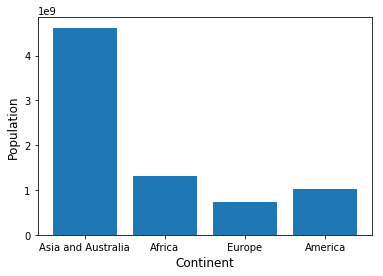

In [194]:
plt.bar(results.continents, results.total_population)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Population', fontsize=12)

* The Result in the gapminder is somewhat true in reality the population of Asia and Australia is over 4 million and population of Europe is under a million. 

### Problem 2
Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution
of income changes over time.

Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that
trend?

What caveats apply to your conclusions?

In [316]:
gdp = pd.read_csv("ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
gdp.head()

,geo,time,gdppercapita_us_inflation_adjusted
0,abw,2010,24271.94042
1,afg,2002,364.57057
2,afg,2003,376.75871
3,afg,2004,364.09544
4,afg,2005,389.41636


In [317]:
# ADDING CONTINENT CODES:
gdp = gdp.merge(geo_mapping[['geo','iso3166_1_alpha2']],on = 'geo')\
.rename(columns = {'iso3166_1_alpha2':'alpha2'})



In [319]:

# dropped values that gave exceptions while converting
gdp = gdp[gdp.alpha2 != 'VA']
gdp = gdp[gdp.alpha2.notnull()]
gdp = gdp[gdp.alpha2 != 'TL']


In [320]:
# Converting alpha2 names (country codes) to continent names
gdp.alpha2 = gdp.alpha2.apply(country_alpha2_to_continent_code)

In [321]:
gdp.head()

,geo,time,gdppercapita_us_inflation_adjusted,alpha2
0,abw,2010,24271.94042,NA
1,afg,2002,364.57057,AS
2,afg,2003,376.75871,AS
3,afg,2004,364.09544,AS
4,afg,2005,389.41636,AS


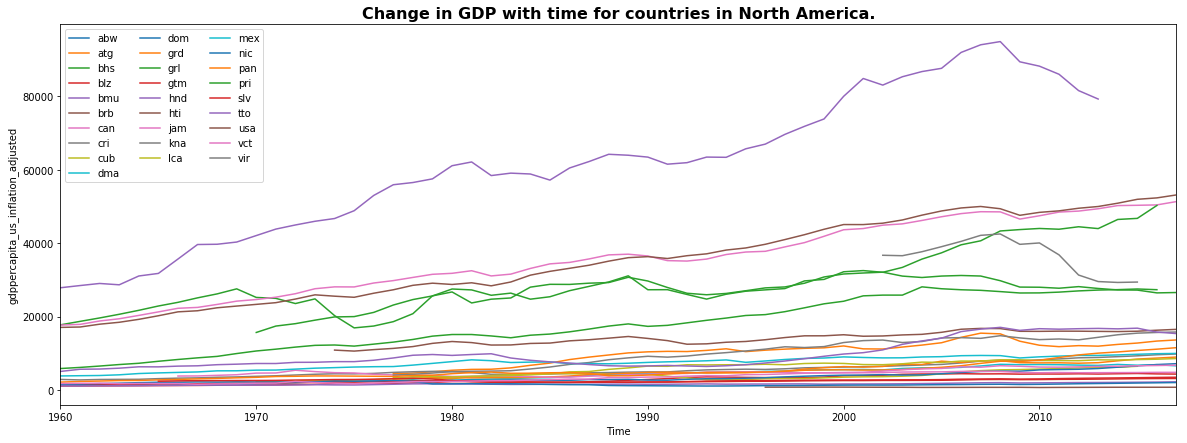

In [322]:
gdp[gdp.alpha2 == 'NA'][["geo","time","gdppercapita_us_inflation_adjusted"]]\
.pivot(index='time', columns='geo', values='gdppercapita_us_inflation_adjusted')\
.plot(figsize=(20,7))

plt.title("Change in GDP with time for countries in North America.", fontsize=16, fontweight='bold')

plt.legend(ncol=3, loc='upper left')
plt.xlabel("Time")
plt.ylabel("gdppercapita_us_inflation_adjusted")

plt.show()

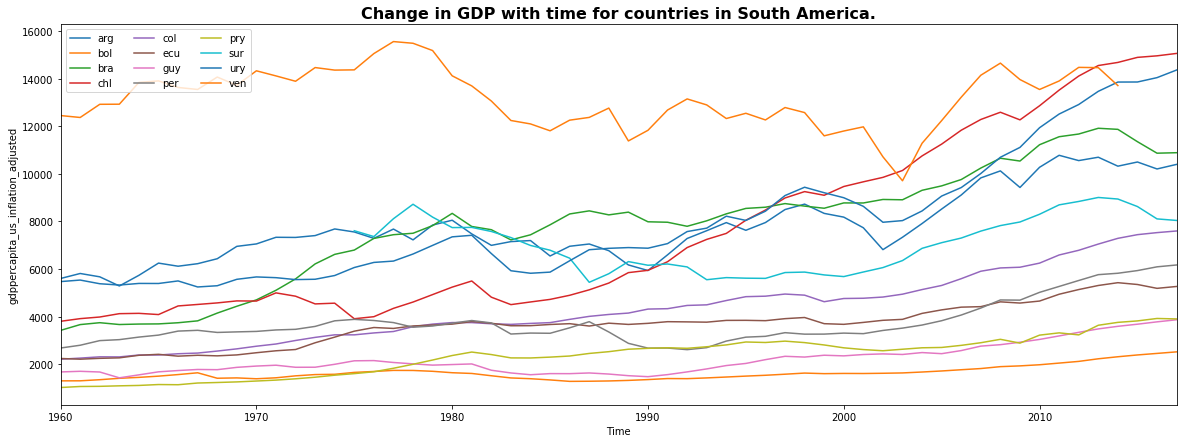

In [323]:
gdp[gdp.alpha2 == 'SA'][["geo","time","gdppercapita_us_inflation_adjusted"]]\
.pivot(index='time', columns='geo', values='gdppercapita_us_inflation_adjusted')\
.plot(figsize=(20,7))

plt.title("Change in GDP with time for countries in South America.", fontsize=16, fontweight='bold')

plt.legend(ncol=3, loc='upper left')
plt.xlabel("Time")
plt.ylabel("gdppercapita_us_inflation_adjusted")

plt.show()

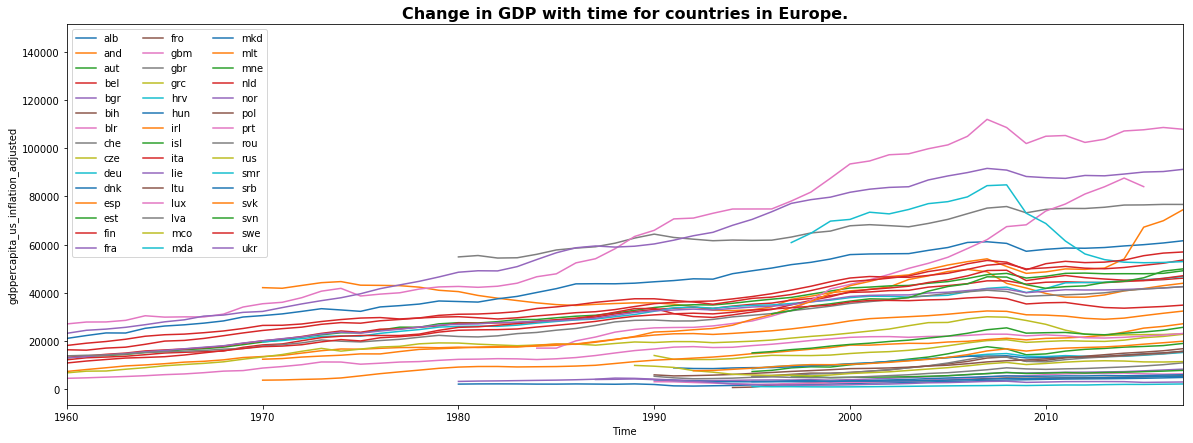

In [324]:
gdp[gdp.alpha2 == 'EU'][["geo","time","gdppercapita_us_inflation_adjusted"]]\
.pivot(index='time', columns='geo', values='gdppercapita_us_inflation_adjusted')\
.plot(figsize=(20,7))

plt.title("Change in GDP with time for countries in Europe.", fontsize=16, fontweight='bold')

plt.legend(ncol=3, loc='upper left')
plt.xlabel("Time")
plt.ylabel("gdppercapita_us_inflation_adjusted")

plt.show()

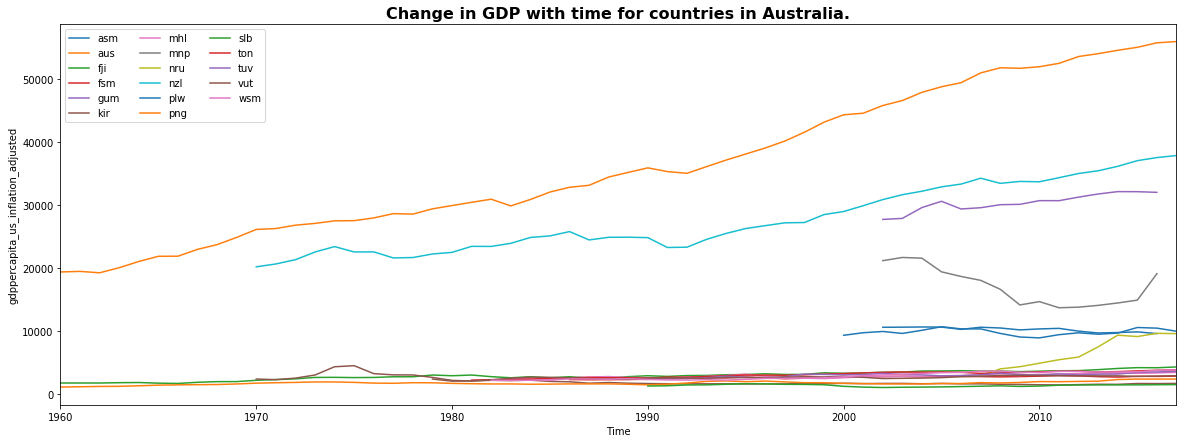

In [325]:
gdp[gdp.alpha2 == 'OC'][["geo","time","gdppercapita_us_inflation_adjusted"]]\
.pivot(index='time', columns='geo', values='gdppercapita_us_inflation_adjusted')\
.plot(figsize=(20,7))

plt.title("Change in GDP with time for countries in Australia.", fontsize=16, fontweight='bold')

plt.legend(ncol=3, loc='upper left')
plt.xlabel("Time")
plt.ylabel("gdppercapita_us_inflation_adjusted")

plt.show()

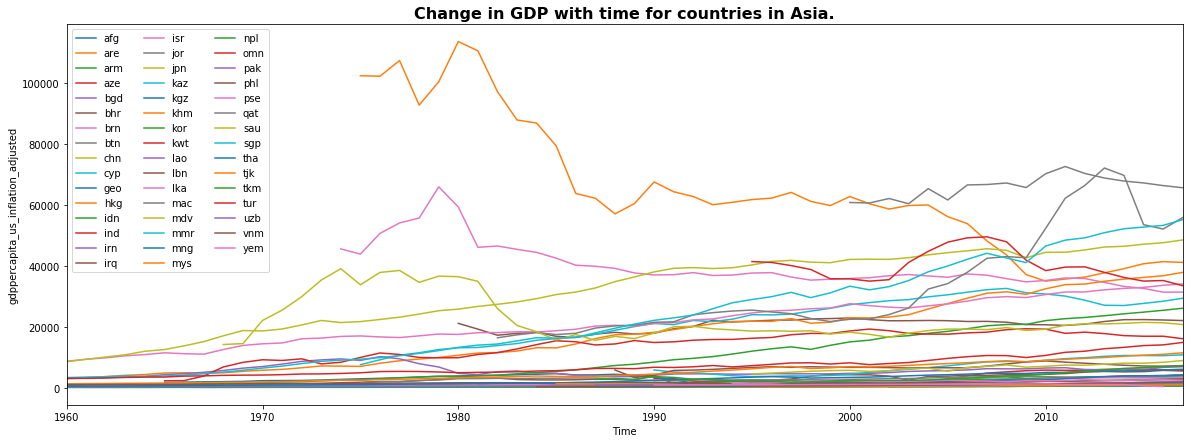

In [326]:
gdp[gdp.alpha2 == 'AS'][["geo","time","gdppercapita_us_inflation_adjusted"]]\
.pivot(index='time', columns='geo', values='gdppercapita_us_inflation_adjusted')\
.plot(figsize=(20,7))

plt.title("Change in GDP with time for countries in Asia.", fontsize=16, fontweight='bold')

plt.legend(ncol=3, loc='upper left')
plt.xlabel("Time")
plt.ylabel("gdppercapita_us_inflation_adjusted")

plt.show()

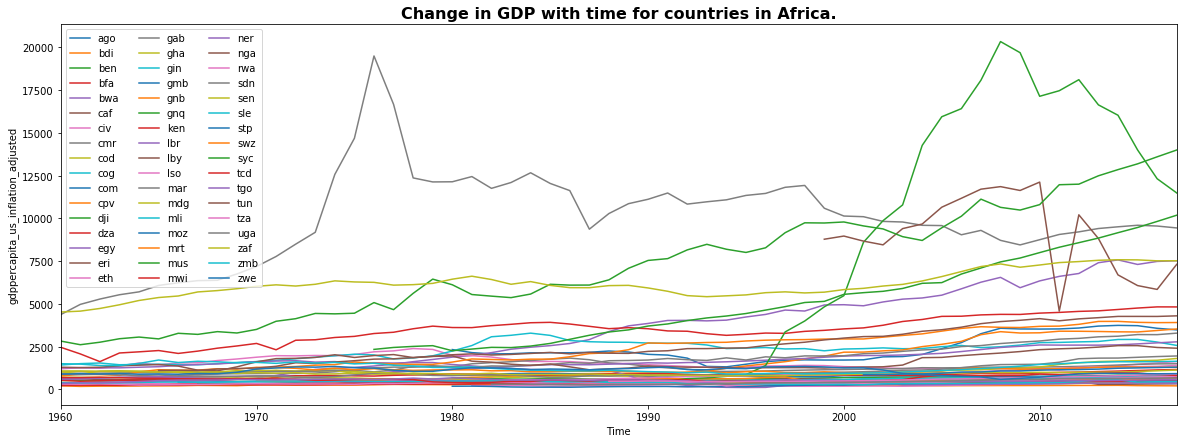

In [327]:
gdp[gdp.alpha2 == 'AF'][["geo","time","gdppercapita_us_inflation_adjusted"]]\
.pivot(index='time', columns='geo', values='gdppercapita_us_inflation_adjusted')\
.plot(figsize=(20,7))

plt.title("Change in GDP with time for countries in Africa.", fontsize=16, fontweight='bold')

plt.legend(ncol=3, loc='upper left')
plt.xlabel("Time")
plt.ylabel("gdppercapita_us_inflation_adjusted")

plt.show()

In [328]:
gdp = gdp.groupby(['alpha2','time']).sum().reset_index()
gdp.head()

,alpha2,time,gdppercapita_us_inflation_adjusted
0,AF,1960,34338.22708
1,AF,1961,34456.80565
2,AF,1962,34890.04361
3,AF,1963,36218.35173
4,AF,1964,37389.03138


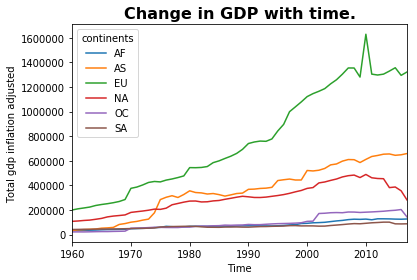

In [329]:
gdp.rename(columns = {'alpha2':'continents'})\
.pivot(index='time', columns='continents', values='gdppercapita_us_inflation_adjusted')\
.plot()

plt.title("Change in GDP with time.", fontsize=16, fontweight='bold')

plt.xlabel("Time")
plt.ylabel("Total gdp inflation adjusted")

plt.show()

####  We can see almost all the continents has seen rise in gdp with time. Europe has the highest rise however asia is catching up as well. We can see spike in Asia after 1970s but it is then following trend like other countries.

* Caveat: the visualizations do not account for special situation like wars or natural disaster.

### Problem 3
Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child
mortality over time. How does each measure change over time within each continent?
Interpret your visualizations, noting any trends and/or outliers.


In [333]:
life_expectancy = pd.read_csv("ddf--datapoints--life_expectancy_years--by--geo--time.csv")
child_mortality = pd.read_csv("ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")
gdppercapita = pd.read_csv("ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")

dependence = pd.merge(child_mortality, life_expectancy, on = ['geo', 'time']) 
dependence = pd.merge(dependence, gdppercapita, on = ['geo', 'time'])
dependence = pd.merge(dependence, geo_mapping, on = 'geo')
dependence.head()



,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,life_expectancy_years,gdppercapita_us_inflation_adjusted,name,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,unicode_region_subtag
0,abw,2010,17.969,75.06,24271.94042,Aruba,AW,ABW,533.0,NaN,AW
1,afg,2002,122.200,52.43,364.57057,Afghanistan,AF,AFG,4.0,NaN,AF
2,afg,2003,118.300,53.03,376.75871,Afghanistan,AF,AFG,4.0,NaN,AF
3,afg,2004,114.400,53.50,364.09544,Afghanistan,AF,AFG,4.0,NaN,AF
4,afg,2005,110.300,53.87,389.41636,Afghanistan,AF,AFG,4.0,NaN,AF


### Problem 4
Choose two variables you have not investigated yet, and visualize their distributions, their relationship with
each other, and how these change over time.

Interpret your visualizations, noting any trends and/or outliers.


### Problem 5
Did you use static or interactive plots to answer the previous problems?

Explore the data using the interactive visualization tools at https://www.gapminder.org/tools, and watch
the TED talk “The best stats you’ve ever seen” at https://www.youtube.com/watch?v=hVimVzgtD6w.

Discuss the advantages, disadvantages, and relative usefulness of using interactive/dynamic visualizations
versus static visualizations.